In [105]:
### Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt

# Task 1

In [106]:
"""
This method reads a GenePattern GCT file and returns a Pandas DataFrame.

Parameters:
- file_path (str): Path to the GCT file.
- summary (bool): Optional; if True, prints the number of rows and columns.

Returns:
- pd.DataFrame: DataFrame containing the contents of the input GCT file.
"""

def read_gene_pattern_gct(file_path, summary=False):
    
    # Read the GCT file while skipping the first 2 lines
    df = pd.read_csv(file_path, sep='\t', skiprows=2)
    
    df.set_index(['Name', 'Description'], inplace=True)
    
    if summary:
        print(f"Data imported with {df.shape[0]} rows and {df.shape[1]} columns.")
        
    return df

# Task 2a

In [107]:
# Reading the Genepattern BRCA_minimal_60x19.gct file and printing the summary using the function implemented in Task 1

file_path = "https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct"
data_frame = read_gct(file_path, summary=True)

Data imported with 60 rows and 19 columns.


# Task 2b

In [108]:
# Reading the Genepattern BRCA_large_20783x40.gct file using the function implemented in Task 1

file_path_2 = "https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct"
df = read_gct(file_path_2)

# Task 3

In [109]:
# Validates if all values in a column fall within the specified bin range.

def validate_bin_ranges(column, bin_edges):
    min_edge, max_edge = bin_edges[0], bin_edges[-1]
    
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    out_of_range_values = numeric_column[(numeric_column < min_edge) | (numeric_column > max_edge)].tolist()
    
    if out_of_range_values:
        return False
    else:
        return True

In [110]:
"""
This function plots histograms for specified columns in the DataFrame.

Parameters:
- df (pd.DataFrame): DataFrame containing the data.

The following columns are plotted:
- 'A7-A0DB-normal'
- 'A7-A13E-normal'
- 'BH-A0B3-primary'
- 'BH-A0B5-primary'
"""

def plot_histograms(df, columns_to_plot):

    # Create subplots for each column
    for col in columns_to_plot:
        if col in df.columns: 
            plt.figure(figsize=(18, 8))
            bin_edges = list(range(0, 25000, 200))  
            
            # Verfiy if data values in each column are within the specified bin ranges. 
            if validate_bin_ranges(col, bin_edges):
                plt.hist(df[col], bins=bin_edges, alpha=0.7, color='cyan', edgecolor='black')
                plt.title(f'Histogram for {col}')
                plt.xlabel('Value')
                plt.ylabel('Frequency')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.show()
            else:
                print(f"Inadequate Bin Size for '{col}'")
                
        else:
            print(f"Column '{col}' not found in the DataFrame.")

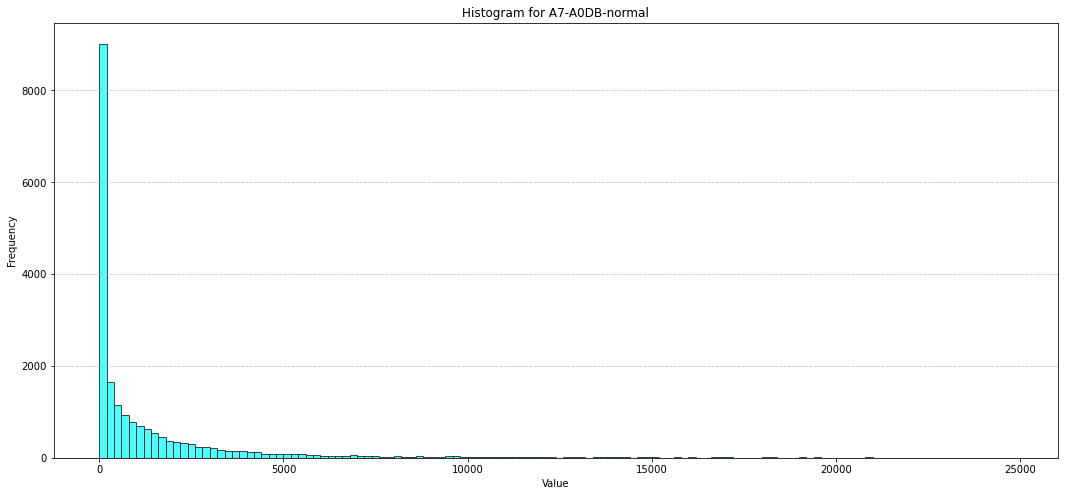

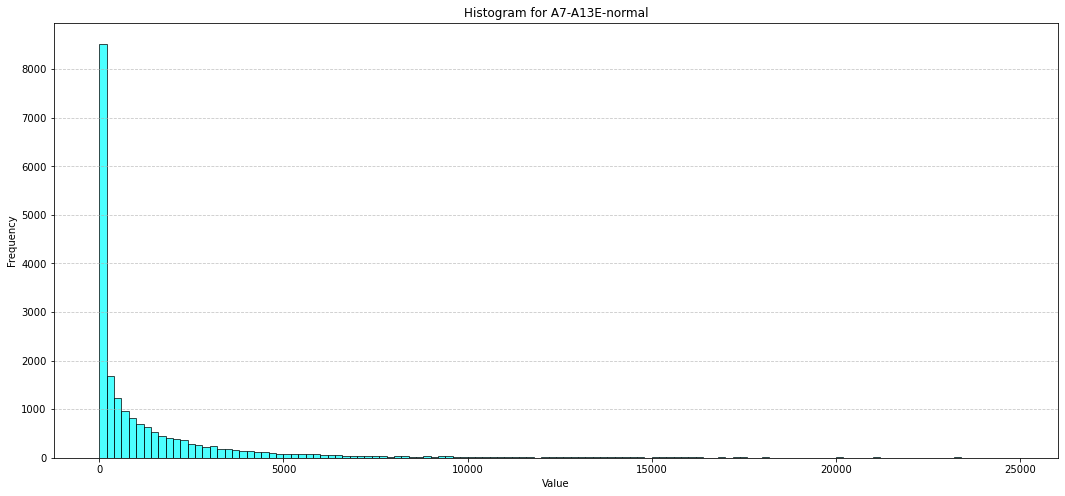

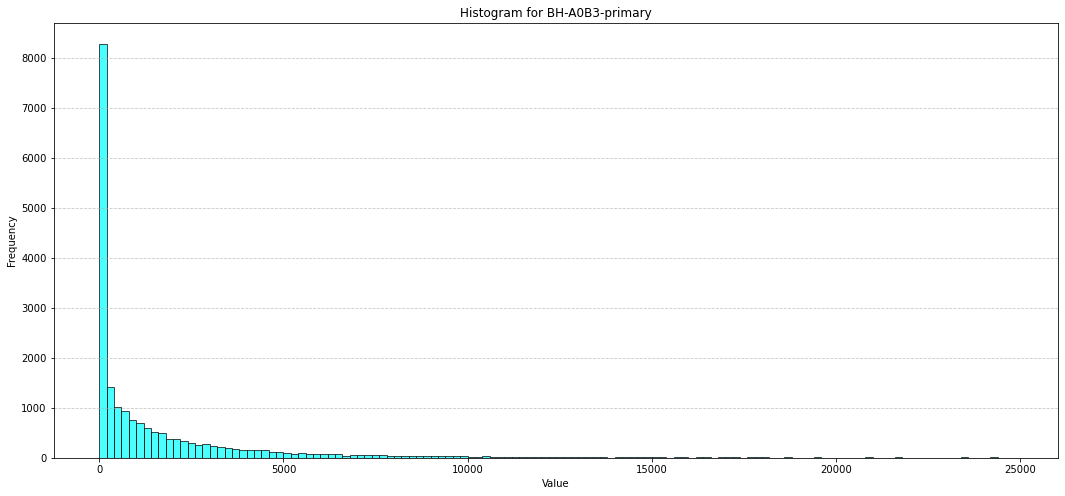

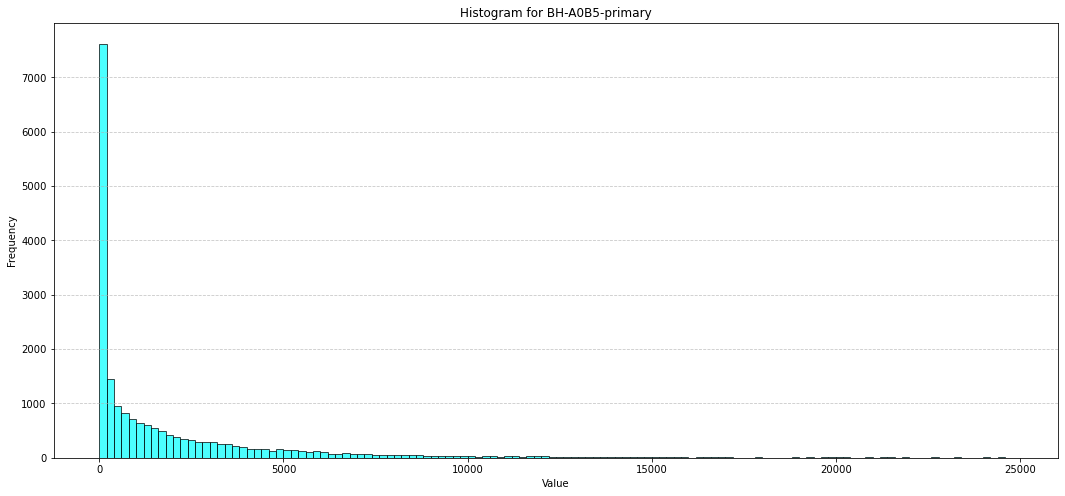

In [111]:
# Plot the histograms for four required columns

columns_to_plot = ['A7-A0DB-normal', 'A7-A13E-normal', 'BH-A0B3-primary', 'BH-A0B5-primary']
plot_histograms(df, columns_to_plot)

# Task 4

In [112]:
"""
The compute_sample_statistics function calculates basic statistical measures—mean, median, and standard deviation—for each sample (column) in a DataFrame.
It then returns a new DataFrame containing these statistics, with each row corresponding to a different sample.
"""

def compute_sample_statistics(df):
    data_columns = df.columns[2:]  # Exclude the first two columns
    stats_df = pd.DataFrame(columns=['Sample name', 'Mean', 'Median', 'Standard deviation'])

    for col in data_columns:
        sample_name = col
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()

        # Append the computed statistics as a new row in stats_df
        stats_df = stats_df.append({
            'Sample name': sample_name,
            'Mean': mean,
            'Median': median,
            'Standard deviation': std_dev
        }, ignore_index=True)

    return stats_df

In [113]:
stats_df = compute_sample_statistics(df)
print(stats_df)

        Sample name         Mean  Median  Standard deviation
0    A7-A0D9-normal  2628.131550   350.0        17827.391513
1    A7-A0DB-normal  2354.674445   362.0        13973.914409
2    A7-A13E-normal  2380.702593   427.0        13373.496798
3    A7-A13F-normal  2493.380215   527.0        12477.592390
4    A7-A13G-normal  3509.542463   454.0        30474.663592
5    AC-A23H-normal  3396.675312   659.0        20073.855034
6    AC-A2FB-normal  3675.583169   792.0        15577.976864
7    AC-A2FF-normal  3743.660492   935.0        14827.012985
8    AC-A2FM-normal  2714.893663   578.0        11431.472640
9    BH-A0AU-normal  2436.466679   641.0         8961.357233
10   BH-A0AY-normal  2412.727951   567.0         9362.391989
11   BH-A0AZ-normal  3216.765337   836.0        10744.505522
12   BH-A0B3-normal  2879.876149   772.0         9737.708560
13   BH-A0B5-normal  3129.721455   358.0        26253.260752
14   BH-A0B7-normal  2337.598326   599.0         8270.506432
15   BH-A0B8-normal  276

# Task 5a

In [114]:
"""
filter_rows_by_max_value function filters out rows from the DataFrame where the maximum value across the data columns is less 
than the specified threshold. 
It returns a new DataFrame containing only the rows with a maximum value greater than or equal to the threshold.
"""

def filter_rows_by_max_value(df, threshold):
    data_columns = df.columns[2:]
    row_max_values = df[data_columns].max(axis=1)
    filtered_df = df[row_max_values >= threshold]
    return filtered_df

In [115]:
# Passing 'df' DataFrame from the previous steps to filter out rows from the DataFrame where the maximum value across the data columns is less than 1000

filtered_df = filter_rows_by_max_value(df, 1000)

# Task 5b

In [116]:
"""
The compute_sample_statistics_filtered_df function calculates basic statistical measures—mean and median, for each sample (column) in a DataFrame.
It then returns a new DataFrame containing these statistics, with each row corresponding to a different sample.
"""

def compute_sample_statistics(df):
    data_columns = df.columns[2:]  # Exclude the first two columns
    stats_df = pd.DataFrame(columns=['Sample name', 'Mean', 'Median'])

    for col in data_columns:
        sample_name = col
        mean = df[col].mean()
        median = df[col].median()

        # Append the computed statistics as a new row in stats_df
        stats_df = stats_df.append({
            'Sample name': sample_name,
            'Mean': mean,
            'Median': median,
        }, ignore_index=True)

    return stats_df

In [117]:
# Computing mean, median and Standard deviation of each column after applying the above filter threshold value filter

stats_filtered_df = compute_sample_statistics(filtered_df)
print(stats_filtered_df)

        Sample name         Mean  Median
0    A7-A0D9-normal  4035.498210  1153.0
1    A7-A0DB-normal  3612.590529  1153.0
2    A7-A13E-normal  3651.797987  1254.5
3    A7-A13F-normal  3819.844817  1435.0
4    A7-A13G-normal  5388.210291  1494.5
5    AC-A23H-normal  5206.393661  1814.5
6    AC-A2FB-normal  5635.925876  2175.0
7    AC-A2FF-normal  5731.855034  2446.5
8    AC-A2FM-normal  4154.506413  1581.0
9    BH-A0AU-normal  3717.526771  1681.5
10   BH-A0AY-normal  3693.421551  1531.0
11   BH-A0AZ-normal  4913.719612  2208.5
12   BH-A0B3-normal  4400.270992  2014.0
13   BH-A0B5-normal  4810.895899  1268.0
14   BH-A0B7-normal  3570.428486  1615.0
15   BH-A0B8-normal  4246.460477  1257.0
16   BH-A0BA-normal  3345.821849  1373.5
17   BH-A0Bc-normal  3724.240716  1439.0
18  A7-A0CE-primary  4742.322371  1785.0
19  A7-A0CH-primary  3468.535496  1372.5
20  A7-A0D9-primary  4082.234825  1539.5
21  A7-A0DB-primary  4570.495600  1613.0
22  A7-A13E-primary  3630.663162  1399.0
23  A7-A13F-prim

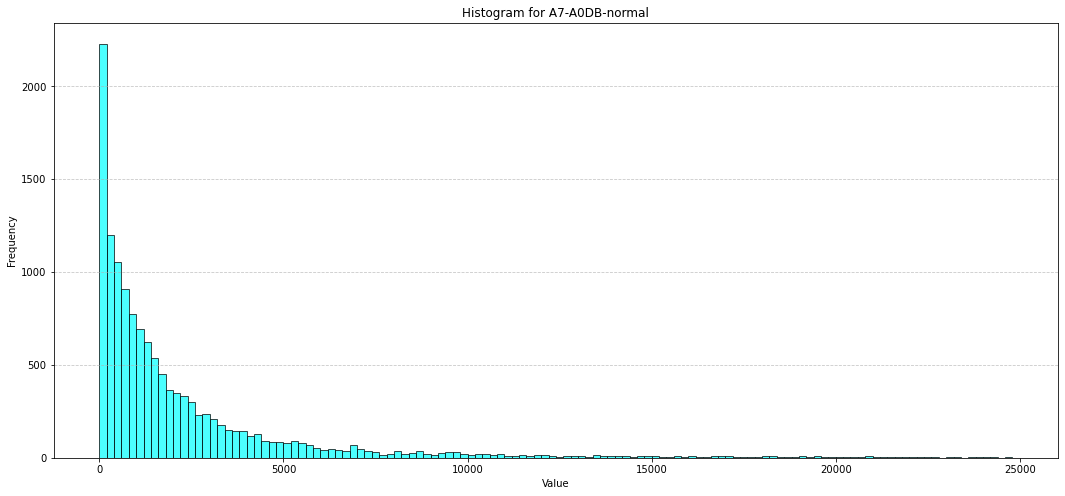

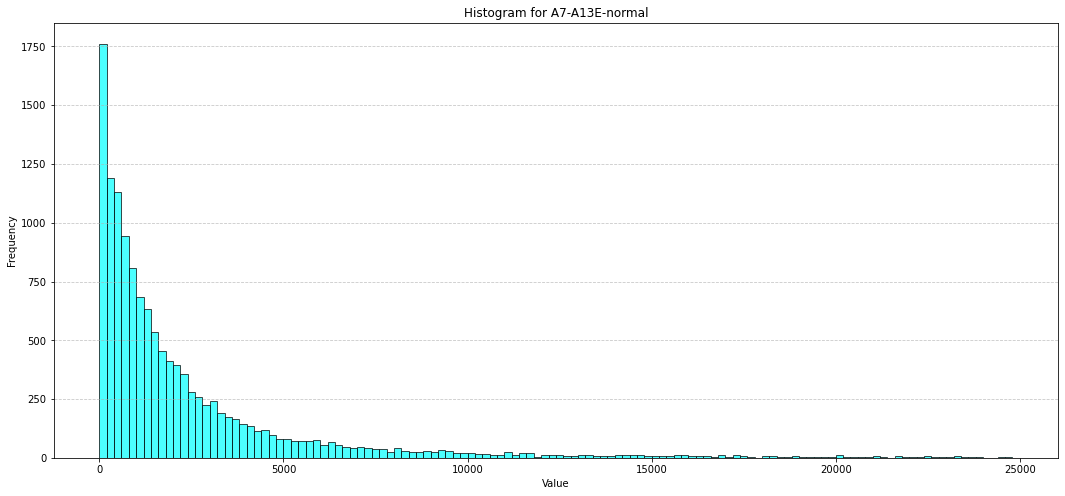

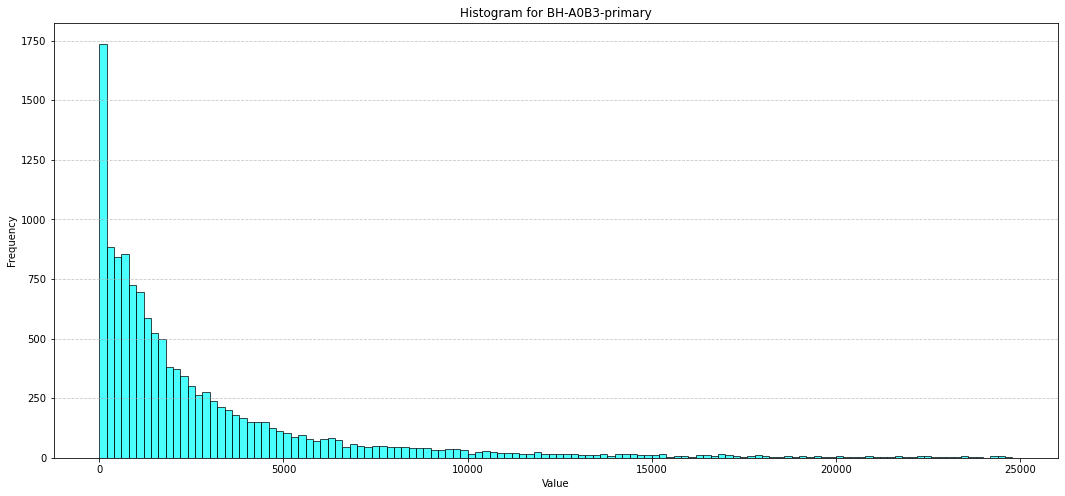

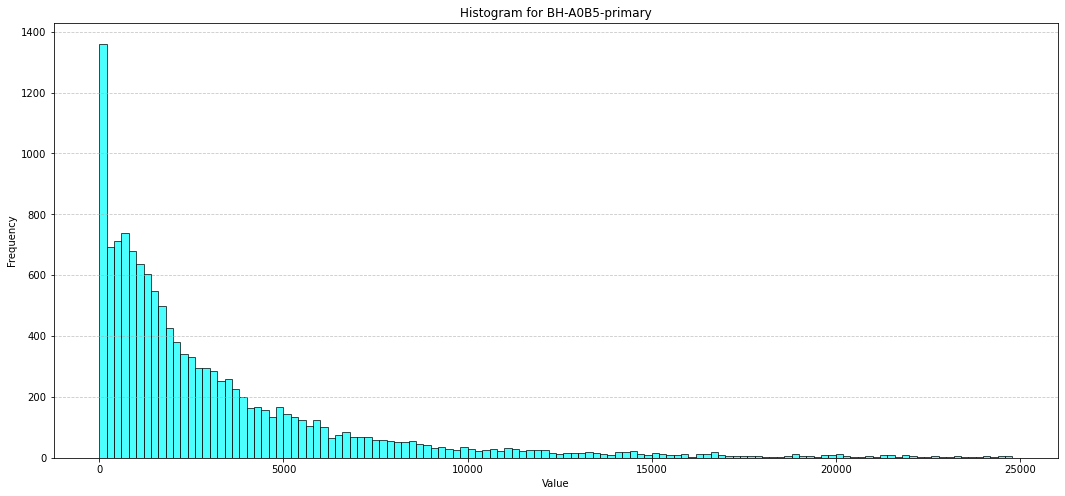

In [118]:
# Plot the histograms for filtered dataframes's four required columns

columns_to_plot = ['A7-A0DB-normal', 'A7-A13E-normal', 'BH-A0B3-primary', 'BH-A0B5-primary']
plot_histograms(filtered_df, columns_to_plot)